In [13]:
# -----------------------------
# Imports & Setup
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path
import sys


project_root = Path.cwd().resolve().parent 
sys.path.append(str(project_root))

from src.data.loader import FraudDataLoader
from src.feature_engineering import FraudFeatureEngineer
from src.utils.io_utils import save_dataframe

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 50)

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger("Feature_Engineering_Fraud")


In [ ]:
# -----------------------------
# Load Fraud Data with Country
# -----------------------------
fraud_loader = FraudDataLoader("../data/processed/fraud_data_with_country.csv")

fraud_df = fraud_loader.load()

logger.info(f"Fraud data shape: {fraud_df.shape}")
logger.info(f"Fraud data columns: {fraud_df.columns}")

2025-12-21 11:45:20,892 [INFO] Credit card data shape: (151112, 12)
2025-12-21 11:45:20,892 [INFO] Credit card data columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')


In [15]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 13.8+ MB


In [16]:
feature_engineer = FraudFeatureEngineer(fraud_df)

2025-12-21 11:45:20,971 [INFO] Initialized FraudFeatureEngineer with 151112 rows


In [17]:
feature_engineer.parse_timestamps()

2025-12-21 11:45:20,980 [INFO] Parsing signup_time and purchase_time to datetime


In [18]:
feature_engineer.add_time_features()
time_cols = ['hour_of_day', 'day_of_week']
feature_engineer.df[time_cols].head(10)

2025-12-21 11:45:21,010 [INFO] Adding hour_of_day and day_of_week features


,hour_of_day,day_of_week
0,2,5
1,1,0
2,18,3
3,13,0
4,18,2
5,8,3
6,3,3
7,17,0
8,14,1
9,23,0


In [19]:
# Step 4: add time since signup
feature_engineer.add_time_since_signup()
feature_engineer.df['time_since_signup'].head(10)

2025-12-21 11:45:21,054 [INFO] Adding time_since_signup feature (hours)


0    1251.856111
1       4.984444
2       0.000278
3     136.690278
4    1211.516944
5    1178.036389
6     604.951389
7    1185.758056
8     998.388889
9    1373.264722
Name: time_since_signup, dtype: float64

In [21]:
# Step 5: add transaction velocity
feature_engineer.add_transaction_velocity()
feature_engineer.df[['transactions_per_user', 'transactions_last_24h', 'purchase_time']]


2025-12-21 11:46:06,048 [INFO] Adding transaction velocity features
C:\Users\amare\Documents\KAIM\week5-6\financial-fraud-detection\src\feature_engineering.py:57: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .rolling('24H')
2025-12-21 11:46:14,255 [INFO] Transaction velocity features added successfully


,transactions_per_user,transactions_last_24h,purchase_time
0,1,1.0,2015-02-21 10:03:37
1,1,1.0,2015-09-26 21:32:16
2,1,1.0,2015-08-13 11:53:07
3,1,1.0,2015-05-20 23:06:42
4,1,1.0,2015-03-04 20:56:37
...,...,...,...
151107,1,1.0,2015-09-30 07:19:17
151108,1,1.0,2015-10-01 07:16:25
151109,1,1.0,2015-06-05 23:36:56
151110,1,1.0,2015-10-07 20:56:54


In [ ]:
fraud_features_df = feature_engineer.get_features()


2025-12-21 11:48:28,119 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:48:28,305 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


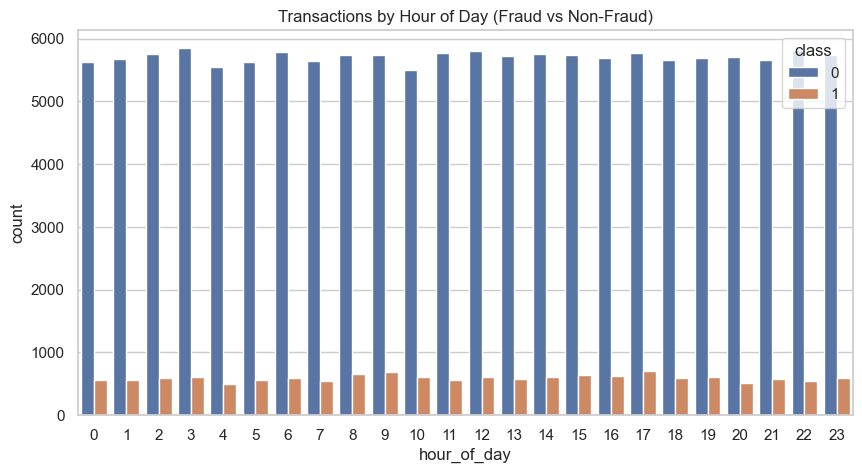

In [22]:

plt.figure(figsize=(10,5))
sns.countplot(x='hour_of_day', hue='class', data=fraud_features_df)
plt.title("Transactions by Hour of Day (Fraud vs Non-Fraud)")
plt.show()


2025-12-21 11:48:49,432 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:48:49,643 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


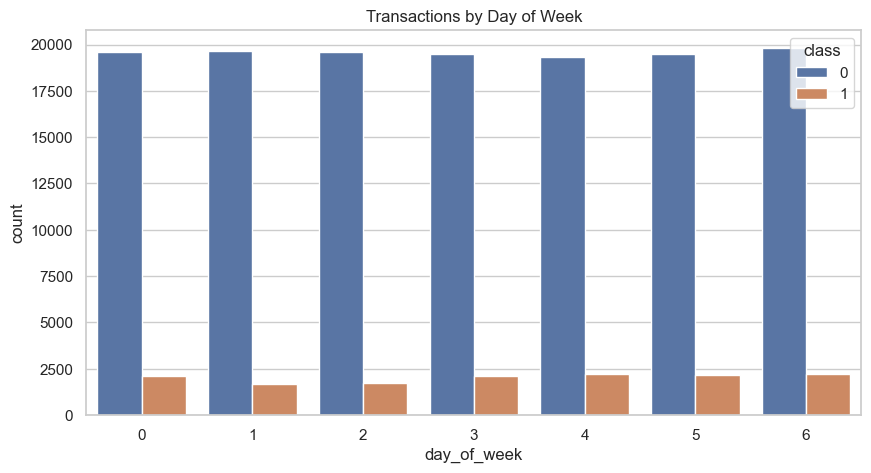

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', hue='class', data=fraud_features_df)
plt.title("Transactions by Day of Week")
plt.show()


2025-12-21 11:49:02,295 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:49:02,442 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


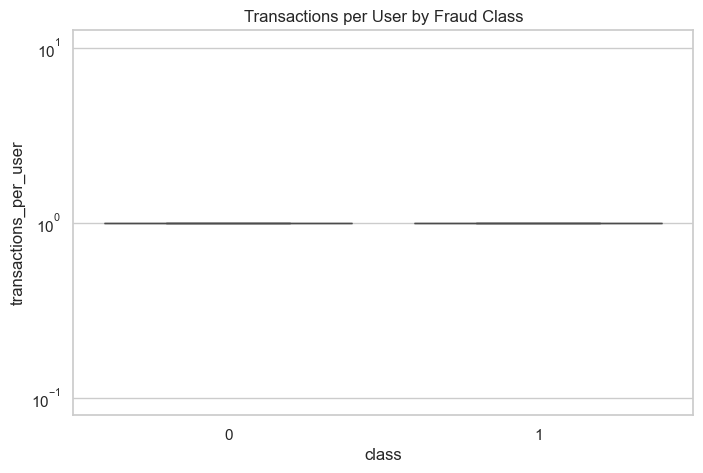

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='transactions_per_user', data=fraud_features_df)
plt.yscale('log')
plt.title("Transactions per User by Fraud Class")
plt.show()


2025-12-21 11:49:22,981 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:49:23,199 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


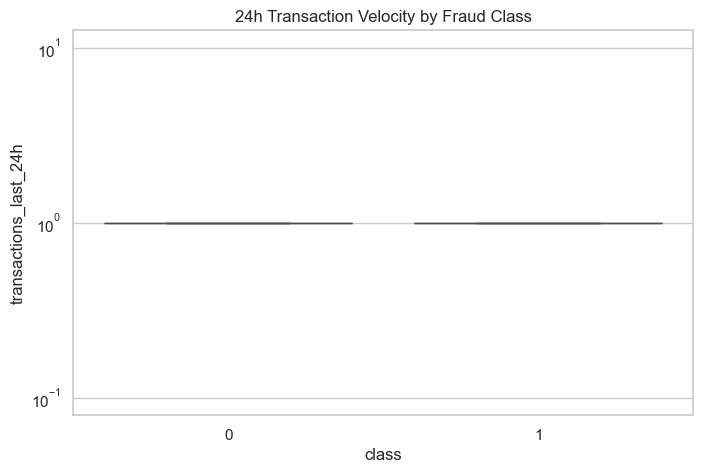

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='transactions_last_24h', data=fraud_features_df)
plt.yscale('log')
plt.title("24h Transaction Velocity by Fraud Class")
plt.show()


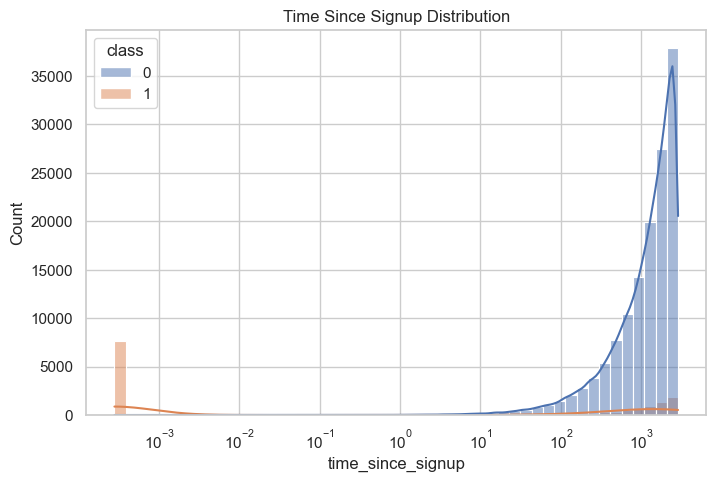

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=fraud_features_df,
    x='time_since_signup',
    hue='class',
    bins=50,
    log_scale=True,
    kde=True
)
plt.title("Time Since Signup Distribution")
plt.show()


2025-12-21 11:50:36,817 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:50:37,019 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


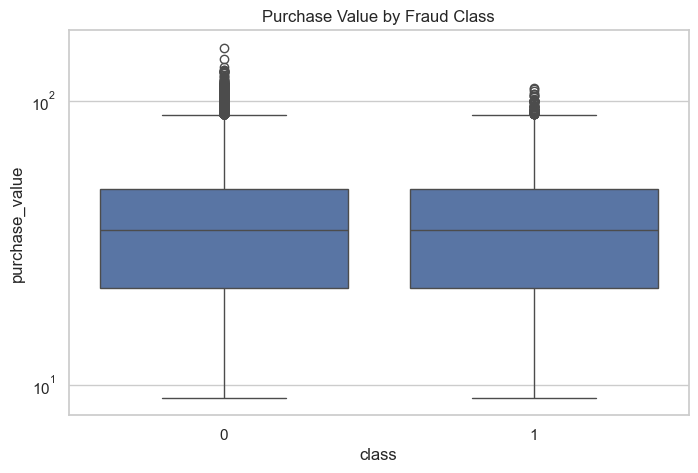

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='purchase_value', data=fraud_features_df)
plt.yscale('log')
plt.title("Purchase Value by Fraud Class")
plt.show()


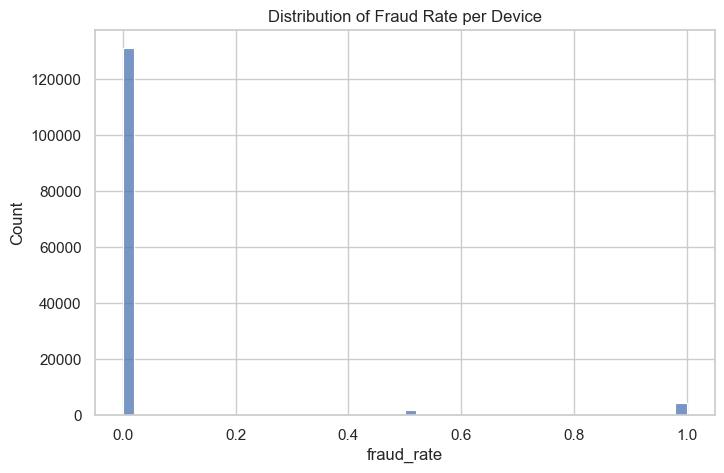

In [28]:
device_counts = (
    fraud_features_df
    .groupby('device_id')['class']
    .mean()
    .reset_index(name='fraud_rate')
)

plt.figure(figsize=(8,5))
sns.histplot(device_counts['fraud_rate'], bins=50)
plt.title("Distribution of Fraud Rate per Device")
plt.show()


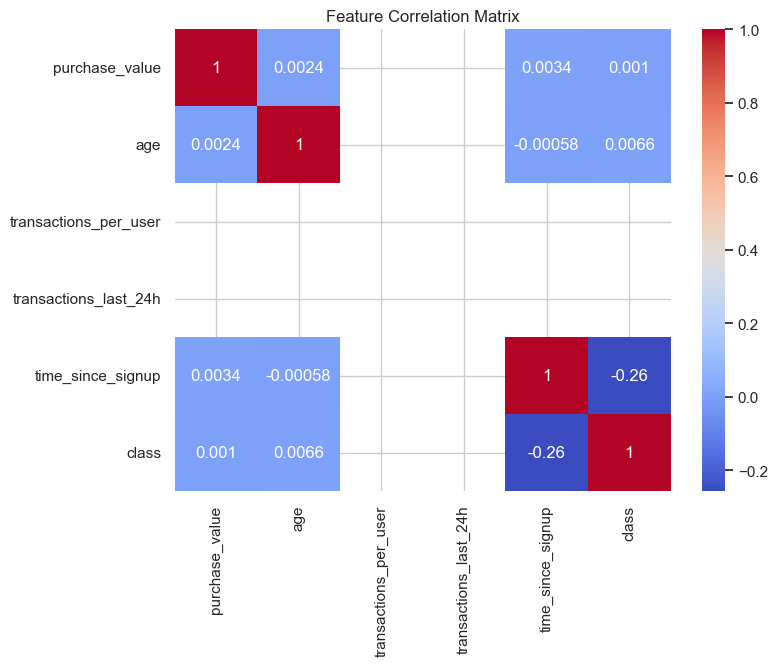

In [29]:
numeric_cols = [
    'purchase_value',
    'age',
    'transactions_per_user',
    'transactions_last_24h',
    'time_since_signup'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    fraud_features_df[numeric_cols + ['class']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Matrix")
plt.show()


2025-12-21 11:52:33,652 [INFO] Fraud rate by hour:
             total  fraud  fraud_rate
hour_of_day                          
0             6186    553    0.089395
1             6228    560    0.089917
2             6338    583    0.091985
3             6458    614    0.095076
4             6050    502    0.082975
5             6189    556    0.089837
6             6380    594    0.093103
7             6181    545    0.088173
8             6387    648    0.101456
9             6418    679    0.105796
10            6100    608    0.099672
11            6327    564    0.089142
12            6403    604    0.094331
13            6292    571    0.090750
14            6355    605    0.095201
15            6369    631    0.099074
16            6309    623    0.098748
17            6466    695    0.107485
18            6252    598    0.095649
19            6299    610    0.096841
20            6221    509    0.081820
21            6224    567    0.091099
22            6358    543    0.085404

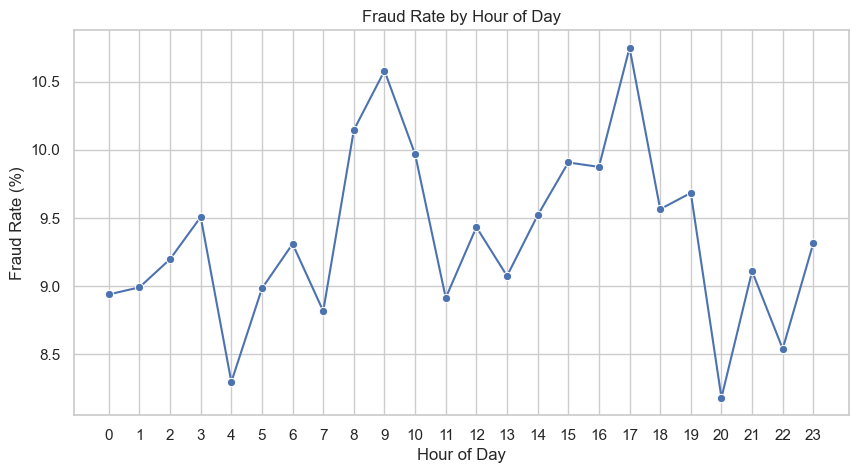

In [30]:

# Compute fraud rate per hour
fraud_by_hour = (
    fraud_features_df.groupby('hour_of_day')['class']
    .agg(total='count', fraud='sum')
)
fraud_by_hour['fraud_rate'] = fraud_by_hour['fraud'] / fraud_by_hour['total']

logger.info(f"Fraud rate by hour:\n{fraud_by_hour}")

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour['fraud_rate']*100, marker='o')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Hour of Day')
plt.title('Fraud Rate by Hour of Day')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


2025-12-21 11:52:55,393 [INFO] Fraud rate by day:
             total  fraud  fraud_rate
day_of_week                          
0            21711   2089    0.096219
1            21314   1669    0.078305
2            21316   1711    0.080268
3            21586   2119    0.098165
4            21522   2192    0.101849
5            21648   2149    0.099270
6            22015   2222    0.100931
2025-12-21 11:52:55,412 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_12752\382272862.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_day.index, y=fraud_by_day['fraud_rate']*100, palette='Reds')
2025-12-21 11:52:55,419 [INFO] Using categorical un

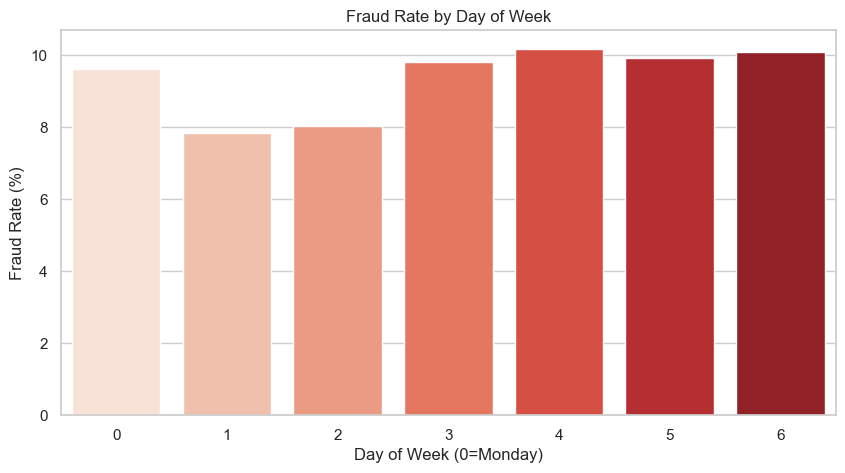

In [31]:
# Compute fraud rate per day of week
fraud_by_day = (
    fraud_features_df.groupby('day_of_week')['class']
    .agg(total='count', fraud='sum')
)
fraud_by_day['fraud_rate'] = fraud_by_day['fraud'] / fraud_by_day['total']

logger.info(f"Fraud rate by day:\n{fraud_by_day}")

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day['fraud_rate']*100, palette='Reds')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Day of Week (0=Monday)')
plt.title('Fraud Rate by Day of Week')
plt.show()


2025-12-21 11:54:01,913 [INFO] Daily fraud rate:
               total  fraud  fraud_rate
purchase_time                          
2015-01-01       571    570    0.998249
2015-01-02       736    725    0.985054
2015-01-03       558    548    0.982079
2015-01-04       639    617    0.965571
2015-01-05       578    556    0.961938


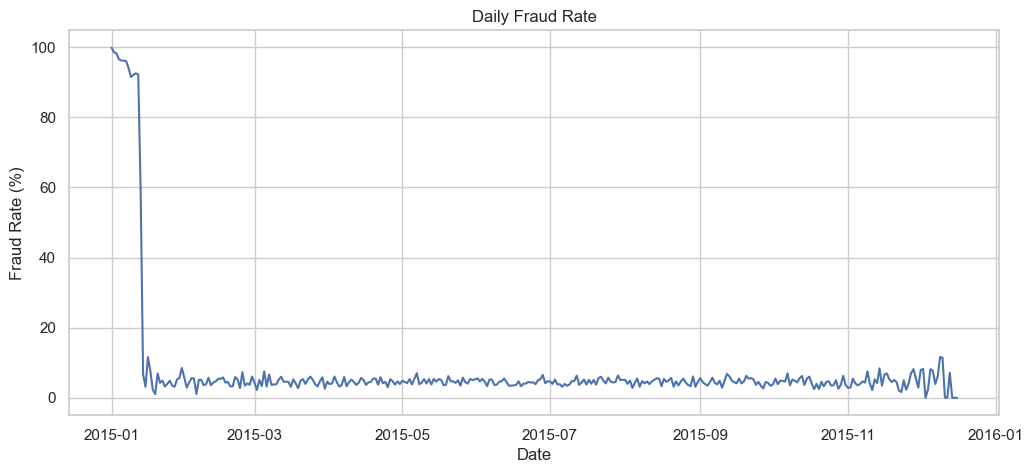

In [32]:
# Ensure purchase_time is datetime
fraud_features_df['purchase_time'] = pd.to_datetime(fraud_features_df['purchase_time'])

# Resample by day
fraud_daily = (
    fraud_features_df.set_index('purchase_time')
    .resample('D')['class']
    .agg(total='count', fraud='sum')
)
fraud_daily['fraud_rate'] = fraud_daily['fraud'] / fraud_daily['total']

logger.info(f"Daily fraud rate:\n{fraud_daily.head()}")

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x=fraud_daily.index, y=fraud_daily['fraud_rate']*100)
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Date')
plt.title('Daily Fraud Rate')
plt.grid(True)
plt.show()


In [33]:
save_dataframe(fraud_features_df, "../data/processed/fraud_data_with_features.csv")
logger.info("Feature fraud data saved to processed folder.")

2025-12-21 12:23:14,596 [INFO] Feature fraud data saved to processed folder.


[IO] Data saved to ..\data\processed\fraud_data_with_features.csv


In [34]:
fraud_features_df.shape

(151112, 17)